In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing


In [44]:
d=pd.read_csv('Video_Store.csv')

In [45]:
d.head()

,ID,Gender,Income,Age,Rentals,AvgPerVisit,Genre
0,1,M,45000,25,27,2.5,Action
1,2,F,54000,33,12,3.4,Drama
2,3,F,32000,20,42,1.6,Comedy
3,4,F,59000,70,16,4.2,Drama
4,5,M,37000,35,25,3.2,Action


In [46]:
d.shape

(40, 7)

In [47]:
d.isnull().sum()

ID             0
Gender         0
Income         0
Age            0
Rentals        0
AvgPerVisit    0
Genre          0
dtype: int64

In [48]:
d.columns

Index(['ID', 'Gender', 'Income', 'Age', 'Rentals', 'AvgPerVisit', 'Genre'], dtype='object')

In [50]:
dX=d.drop(['Gender','Genre'],axis=1)
dX

,ID,Income,Age,Rentals,AvgPerVisit
0,1,45000,25,27,2.5
1,2,54000,33,12,3.4
2,3,32000,20,42,1.6
3,4,59000,70,16,4.2
4,5,37000,35,25,3.2
5,6,18000,20,33,1.7
6,7,29000,45,19,3.8
7,8,74000,25,31,2.4
8,9,38000,21,18,2.1
9,10,65000,40,21,3.3


In [52]:
d['Income'].value_counts()

29000    3
41000    3
45000    2
17000    2
68000    2
74000    2
47000    2
57000    1
62000    1
12000    1
15000    1
1000     1
79000    1
49000    1
23000    1
2000     1
25000    1
56000    1
36000    1
24000    1
6000     1
54000    1
83000    1
26000    1
65000    1
38000    1
18000    1
37000    1
59000    1
32000    1
89000    1
Name: Income, dtype: int64

In [54]:
y=d['Income']
y

0     45000
1     54000
2     32000
3     59000
4     37000
5     18000
6     29000
7     74000
8     38000
9     65000
10    41000
11    26000
12    83000
13    45000
14    68000
15    17000
16    36000
17     6000
18    24000
19    12000
20    47000
21    25000
22     2000
23    79000
24     1000
25    56000
26    62000
27    57000
28    15000
29    41000
30    49000
31    47000
32    23000
33    29000
34    74000
35    29000
36    89000
37    41000
38    68000
39    17000
Name: Income, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


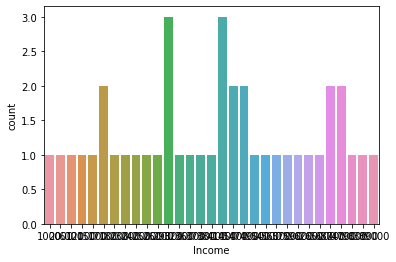

In [55]:
import seaborn
seaborn.countplot(d['Income'])

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test=SelectKBest(score_func=f_classif,k=4)
test.fit(dX,y)
pd.DataFrame(test.scores_)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,0
0,0.501571
1,inf
2,2.215558
3,0.752034
4,1.013522


In [57]:
X=d[['ID', 'Income', 'Age', 'Rentals', 'AvgPerVisit']].values

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=31)

In [60]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=31)

In [62]:
pred=knn.predict(X)
pred

array([29000, 29000, 29000, 29000, 29000, 29000, 29000, 29000, 29000,
       29000, 29000, 29000, 29000, 29000, 29000, 29000, 29000, 29000,
       29000, 29000, 29000, 29000, 29000, 29000, 29000, 29000, 29000,
       29000, 29000, 29000, 29000, 29000, 29000, 29000, 29000, 29000,
       29000, 29000, 29000, 29000])

In [63]:
knn.score(X,y)

0.075

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [65]:
accuracy_score(y,pred)

0.075

In [66]:
confusion_matrix(y,pred)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0,

Text(0.5, 257.44, 'Predicted label')

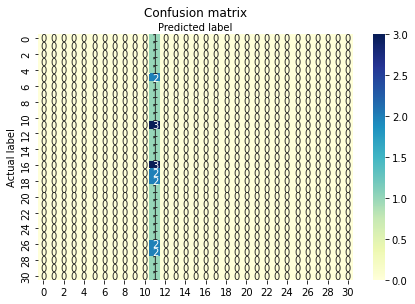

In [67]:
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
seaborn.heatmap(pd.DataFrame(confusion_matrix(y,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00         1
        2000       0.00      0.00      0.00         1
        6000       0.00      0.00      0.00         1
       12000       0.00      0.00      0.00         1
       15000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         2
       18000       0.00      0.00      0.00         1
       23000       0.00      0.00      0.00         1
       24000       0.00      0.00      0.00         1
       25000       0.00      0.00      0.00         1
       26000       0.00      0.00      0.00         1
       29000       0.07      1.00      0.14         3
       32000       0.00      0.00      0.00         1
       36000       0.00      0.00      0.00         1
       37000       0.00      0.00      0.00         1
       38000       0.00      0.00      0.00         1
       41000       0.00      0.00      0.00         3
       45000       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
